<a href="https://colab.research.google.com/github/Akk216/GeNWrK/blob/main/CH20B017_CIFAR%26IOU_Pytorch_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 1

1.   PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. Use the `torchvision.datasets` to import preloaded Dataset [`CIFAR`](https://pytorch.org/vision/stable/datasets.html#cifar) to train and then finetune the ResNet18 model.

In [ ]:
#Loading in Resnet18 pre-trained Model

''' Enter your code here''' 
from torchvision import models
model = models.resnet18(pretrained = True)

#You can use ```dir(models)``` to see various models available for Transfer Learning

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [ ]:
#Freeze the model weights
'''Enter your code here'''
for param in model.parameters():
    param.requires_grad = False


In [ ]:
#Add the fully connected layer
#Here replace num_classes with number of classes you are classifying 
num_classes=10
import torch
import torch.nn as nn
model.fc = nn.Linear(512, num_classes)
#Check model summary once to ensure the changes you made
if torch.cuda.is_available():
  model.cuda()
from torchsummary import summary
summary(model, input_size=(3, 64, 64), batch_size=128,device='cuda')
#Check model summary once to ensure the changes you made

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [128, 64, 32, 32]           9,408
       BatchNorm2d-2          [128, 64, 32, 32]             128
              ReLU-3          [128, 64, 32, 32]               0
         MaxPool2d-4          [128, 64, 16, 16]               0
            Conv2d-5          [128, 64, 16, 16]          36,864
       BatchNorm2d-6          [128, 64, 16, 16]             128
              ReLU-7          [128, 64, 16, 16]               0
            Conv2d-8          [128, 64, 16, 16]          36,864
       BatchNorm2d-9          [128, 64, 16, 16]             128
             ReLU-10          [128, 64, 16, 16]               0
       BasicBlock-11          [128, 64, 16, 16]               0
           Conv2d-12          [128, 64, 16, 16]          36,864
      BatchNorm2d-13          [128, 64, 16, 16]             128
             ReLU-14          [128, 64,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#Define your transformations to be applied on the images here
from torchvision import transforms
'''your code here'''
train = transforms.Compose([   
         #Pads the image          
         #Rotates,translates,scales,etc. images 
        transforms.Resize(64),  # Note that we want to use Inception v3, it requires this size of images
        transforms.RandomHorizontalFlip(),  #Now we are not using vertical flip because we don't expect such an input in real life
        transforms.ToTensor(),              
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),  #Standard ImageNet values for pretrained models
    ])

val = transforms.Compose([     
        transforms.Resize(64),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

In [ ]:
#Import the CIFAR apply the transformations you created above
#You can access the link given in question statement to check syntax for importing fakedata dataset

'''your code here'''
from torchvision.datasets import CIFAR10
dataset=CIFAR10(root='/data',download=True,transform=train)
val_size=int(0.1*len(dataset))
train_size=len(dataset)-val_size
train_ds,val_ds=torch.utils.data.dataset.random_split(dataset,[train_size,val_size])
#Remember to split the dataset into train_dataset and val_dataset


Extracting /data/cifar-10-python.tar.gz to /data


In [ ]:
#Create DataLoaders for you train and val Datasets
'''your code here'''
from torch.utils.data import DataLoader
batch_size=128
train_dl=DataLoader(train_ds,batch_size,shuffle=True)
val_dl=DataLoader(val_ds,batch_size,shuffle=True)

In [ ]:
dataset.classes[2]

'bird'

Label: cat (Class No: 3)
torch.Size([3, 64, 64])


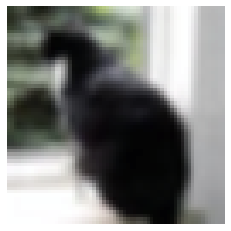

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def show_sample(image, label, dataset):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    print(img.size())
    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))
    #Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0,1)
    plt.imshow(image)
    plt.axis('off')

a=torch.randint(low=0,high=100,size=[1])
img,label=train_ds[a]
show_sample(img,label,dataset)

In [ ]:
for images,label in train_dl:
  if torch.cuda.is_available():
    images=images.cuda()
  out=model(images)
  out,preds=torch.max(out,axis=1)
  print(preds)
  break

tensor([8, 2, 8, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 8, 2, 2, 1, 2, 2, 8, 2, 9, 8,
        3, 6, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 9, 9, 2, 1, 2, 1, 2,
        8, 3, 8, 1, 1, 2, 8, 3, 2, 2, 2, 5, 2, 8, 2, 3, 9, 2, 2, 6, 2, 2, 2, 8,
        9, 3, 2, 4, 3, 8, 2, 1, 2, 9, 5, 2, 2, 9, 4, 2, 2, 2, 2, 8, 2, 2, 2, 2,
        2, 2, 0, 8, 8, 2, 2, 3, 2, 8, 9, 1, 8, 2, 1, 0, 8, 2, 2, 2, 2, 0, 2, 2,
        3, 9, 1, 2, 8, 2, 1, 2], device='cuda:0')


In [ ]:
%%time
import numpy as np
import torch


def train(model,
          criterion,
          optimizer,          
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=2):
  
  # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    

     # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')
    
    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
       
        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if torch.cuda.is_available():
              data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Get model outputs and calculate loss
 
            output = model(data)

            # Loss and backpropagation of gradients
            loss= criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            
        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if torch.cuda.is_available():
                      data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \t\t\t Validation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        
                        return model

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
   
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
   
    return model


CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.2 µs


In [ ]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
%%time
model = train(
    model,
    criterion,
    optimizer,
    train_dl,
    val_dl,
    save_file_name="best.pth",
    max_epochs_stop=5,
    n_epochs=30,
    print_every=1)

Starting Training from Scratch.


Epoch: 0 	Training Loss: 1.3623 			Validation Loss: 1.3119
		Training Accuracy: 57.24%		 Validation Accuracy: 58.82%

Epoch: 1 	Training Loss: 1.3224 			Validation Loss: 1.2941
		Training Accuracy: 59.79%		 Validation Accuracy: 60.80%

Epoch: 2 	Training Loss: 1.3327 			Validation Loss: 1.2898
		Training Accuracy: 60.06%		 Validation Accuracy: 61.44%

Epoch: 3 	Training Loss: 1.3468 			Validation Loss: 1.4193
		Training Accuracy: 60.10%		 Validation Accuracy: 59.50%

Epoch: 4 	Training Loss: 1.3490 			Validation Loss: 1.2843
		Training Accuracy: 60.16%		 Validation Accuracy: 61.56%

Epoch: 5 	Training Loss: 1.3279 			Validation Loss: 1.2896
		Training Accuracy: 60.48%		 Validation Accuracy: 60.80%

Epoch: 6 	Training Loss: 1.3399 			Validation Loss: 1.2596
		Training Accuracy: 60.33%		 Validation Accuracy: 62.52%

Epoch: 7 	Training Loss: 1.3535 			Validation Loss: 1.3332
		Training Accuracy: 60.13%		 Validation Accuracy: 61.10%

Epoch: 8 	Training Los

In [ ]:
'''Unfreeze models and improve accuracy'''
for param in model.parameters():
    param.requires_grad = True
summary(model, input_size=(3,64,64), batch_size=128, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [128, 64, 32, 32]           9,408
       BatchNorm2d-2          [128, 64, 32, 32]             128
              ReLU-3          [128, 64, 32, 32]               0
         MaxPool2d-4          [128, 64, 16, 16]               0
            Conv2d-5          [128, 64, 16, 16]          36,864
       BatchNorm2d-6          [128, 64, 16, 16]             128
              ReLU-7          [128, 64, 16, 16]               0
            Conv2d-8          [128, 64, 16, 16]          36,864
       BatchNorm2d-9          [128, 64, 16, 16]             128
             ReLU-10          [128, 64, 16, 16]               0
       BasicBlock-11          [128, 64, 16, 16]               0
           Conv2d-12          [128, 64, 16, 16]          36,864
      BatchNorm2d-13          [128, 64, 16, 16]             128
             ReLU-14          [128, 64,

In [ ]:
%%time
model = train(
    model,
    criterion,
    optimizer,
    train_dl,
    val_dl,
    save_file_name="best.pth",
    max_epochs_stop=5,
    n_epochs=30,
    print_every=1)

Model has been trained for: 12 epochs.


Epoch: 0 	Training Loss: 1.7979 			Validation Loss: 1.6410
		Training Accuracy: 33.98%		 Validation Accuracy: 40.76%

Epoch: 1 	Training Loss: 1.3566 			Validation Loss: 1.2364
		Training Accuracy: 50.78%		 Validation Accuracy: 55.88%

Epoch: 2 	Training Loss: 1.0961 			Validation Loss: 1.1242
		Training Accuracy: 61.12%		 Validation Accuracy: 61.50%

Epoch: 3 	Training Loss: 0.9145 			Validation Loss: 0.9717
		Training Accuracy: 67.66%		 Validation Accuracy: 67.72%

Epoch: 4 	Training Loss: 0.8110 			Validation Loss: 1.0076
		Training Accuracy: 71.81%		 Validation Accuracy: 67.54%

Epoch: 5 	Training Loss: 0.7385 			Validation Loss: 0.8150
		Training Accuracy: 74.57%		 Validation Accuracy: 71.76%

Epoch: 6 	Training Loss: 0.6321 			Validation Loss: 0.8525
		Training Accuracy: 78.21%		 Validation Accuracy: 71.34%

Epoch: 7 	Training Loss: 0.5780 			Validation Loss: 0.7645
		Training Accuracy: 80.21%		 Validation Accuracy: 74.24%

Epoch: 8 	Train

#TASK 2

In [ ]:
import random
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import pandas as pd

In [ ]:
# Load the datasets
# reading CSV file
! git clone https://github.com/nbala2k2/SummerSchool-CV-Implementation-2021
%cd SummerSchool-CV-Implementation-2021/Dataset for IOU & NMS implementation/
data_iou = pd.read_csv("iou_testcases.csv")
data_iou

Cloning into 'SummerSchool-CV-Implementation-2021'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 73 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/SummerSchool-CV-Implementation-2021/Dataset for IOU & NMS implementation


,Test_case_number,Box_1,Box_2
0,Test_case_1,"[199, 422, 477, 474]","[31, 419, 204, 436]"
1,Test_case_2,"[345, 367, 449, 502]","[335, 333, 374, 452]"
2,Test_case_3,"[350, 147, 492, 20]","[462, 157, 478, 357]"
3,Test_case_4,"[215, 251, 446, 425]","[126, 463, 360, 510]"


In [ ]:
# Load the datasets
# reading CSV file
data_nms = pd.read_csv("nms_testcases.csv")
data_nms

,Test_case_number,Box_1,Box_2,Box_3,Box_4
0,Test_case_1,"[200, 100, 300, 300, 0.95]","[220, 110, 320, 310, 0.85]","[180, 90, 280, 290, 0.85]","[210, 120, 310, 320, 0.65]"
1,Test_case_2,"[200, 100, 400, 200, 0.65]","[220, 110, 420, 210, 0.85]","[180, 90, 380, 190, 0.5]","[210, 120, 410, 220, 0.6]"
2,Test_case_3,"[100, 150, 330, 290, 0.68]","[90, 175, 320, 310, 0.9]","[350, 90, 450, 290, 0.85]","[340, 110, 440, 310, 0.75]"
3,Test_case_4,"[100, 100, 200, 300, 0.95]","[150, 110, 250, 310, 0.85]","[200, 90, 300, 290, 0.85]","[250, 120, 350, 320, 0.63]"


In [ ]:
listOfdata = data_iou.to_numpy().tolist()
listOfdata

[['Test_case_1', '[199, 422, 477, 474]', '[31, 419, 204, 436]'],
 ['Test_case_2', '[345, 367, 449, 502]', '[335, 333, 374, 452]'],
 ['Test_case_3', '[350, 147, 492, 20]', '[462, 157, 478, 357]'],
 ['Test_case_4', '[215, 251, 446, 425]', '[126, 463, 360, 510]']]

In [ ]:
# Convert the pandas dataframe into lists
import ast
#Create list of bounding box coordinates for each of the test cases:
iou_test_case_1 = [ast.literal_eval(listOfdata[0][1]), ast.literal_eval(listOfdata[0][2])]
iou_test_case_2 = [ast.literal_eval(listOfdata[1][1]), ast.literal_eval(listOfdata[1][2])]
iou_test_case_3 = [ast.literal_eval(listOfdata[2][1]), ast.literal_eval(listOfdata[2][2])]
iou_test_case_4 = [ast.literal_eval(listOfdata[3][1]), ast.literal_eval(listOfdata[3][2])]
iou_test_case_1

[[199, 422, 477, 474], [31, 419, 204, 436]]

In [ ]:
# Convert the pandas dataframe into lists
listOfDFRows = data_nms.to_numpy().tolist()
print(listOfDFRows)
#Create list of bounding box coordinates for each of the test cases:
nms_test_case_1 = [ast.literal_eval(listOfDFRows[0][1]), ast.literal_eval(listOfDFRows[0][2]), ast.literal_eval(listOfDFRows[0][3]), ast.literal_eval(listOfDFRows[0][4])]
nms_test_case_2 = [ast.literal_eval(listOfDFRows[1][1]), ast.literal_eval(listOfDFRows[1][2]), ast.literal_eval(listOfDFRows[1][3]), ast.literal_eval(listOfDFRows[1][4])]
nms_test_case_3 = [ast.literal_eval(listOfDFRows[2][1]), ast.literal_eval(listOfDFRows[2][2]), ast.literal_eval(listOfDFRows[2][3]), ast.literal_eval(listOfDFRows[2][4])]
nms_test_case_4 = [ast.literal_eval(listOfDFRows[3][1]), ast.literal_eval(listOfDFRows[3][2]), ast.literal_eval(listOfDFRows[3][3]), ast.literal_eval(listOfDFRows[3][4])]
nms_test_case_1

[['Test_case_1', '[200, 100, 300, 300, 0.95]', '[220, 110, 320, 310, 0.85]', '[180, 90, 280, 290, 0.85]', '[210, 120, 310, 320, 0.65]'], ['Test_case_2', '[200, 100, 400, 200, 0.65]', '[220, 110, 420, 210, 0.85]', '[180, 90, 380, 190, 0.5]', '[210, 120, 410, 220, 0.6]'], ['Test_case_3', '[100, 150, 330, 290, 0.68]', '[90, 175, 320, 310, 0.9]', '[350, 90, 450, 290, 0.85]', '[340, 110, 440, 310, 0.75]'], ['Test_case_4', '[100, 100, 200, 300, 0.95]', '[150, 110, 250, 310, 0.85]', '[200, 90, 300, 290, 0.85]', '[250, 120, 350, 320, 0.63]']]


[[200, 100, 300, 300, 0.95],
 [220, 110, 320, 310, 0.85],
 [180, 90, 280, 290, 0.85],
 [210, 120, 310, 320, 0.65]]

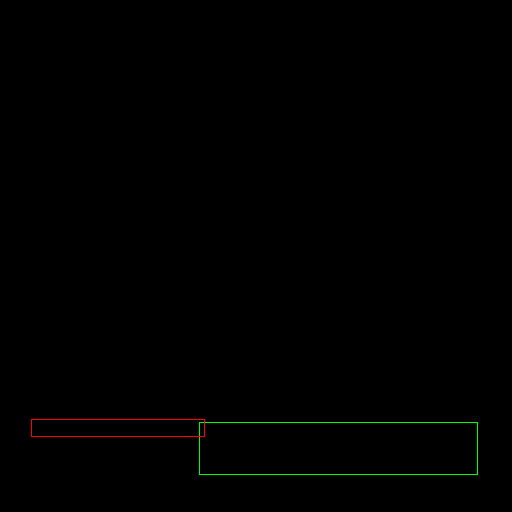

In [ ]:

# Visualize the boxes for one of the test cases
img = np.zeros([512,512,3] ,dtype = np.uint8)
box1, box2= iou_test_case_1[0], iou_test_case_1[1]
img2 = cv2.rectangle(img, (box1[0], box1[1]), (box1[2], box1[3]) , color = (0,255,0))#green
img2 = cv2.rectangle(img, (box2[0], box2[1]), (box2[2], box2[3]) , color = (0,0,255))#red

cv2_imshow(img2)

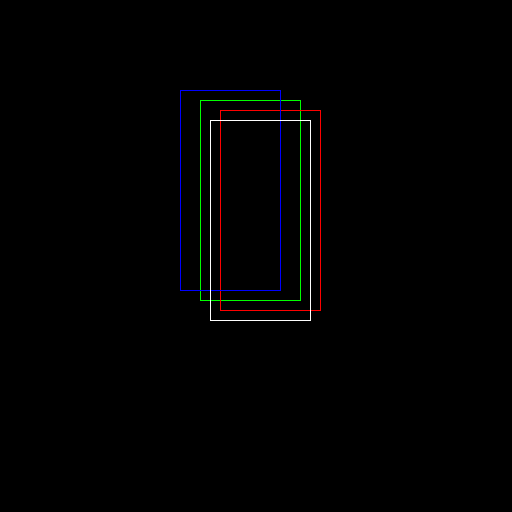

In [ ]:
# Visualize the boxes for one of the test cases
img = np.zeros([512,512,3] ,dtype = np.uint8)
box1, box2, box3, box4 = nms_test_case_1[0], nms_test_case_1[1], nms_test_case_1[2], nms_test_case_1[3]
img2 = cv2.rectangle(img, (box1[0], box1[1]), (box1[2], box1[3]) , color = (0,255,0))
img2 = cv2.rectangle(img, (box2[0], box2[1]), (box2[2], box2[3]) , color = (0,0,255))
img2 = cv2.rectangle(img, (box3[0], box3[1]), (box3[2], box3[3]) , color = (255,0,0))
img2 = cv2.rectangle(img, (box4[0], box4[1]), (box4[2], box4[3]) , color = (255,255,255)) 
cv2_imshow(img2)

In [ ]:
'''
Exercise: Implement iou(). Some hints:
    In this exercise only, we define a box using its two corners (upper left and
     lower right): (x1, y1, x2, y2) rather than the midpoint and height/width.
    To calculate the area of a rectangle you need to multiply its height 
    (y2 - y1) by its width (x2 - x1)
    You'll also need to find the coordinates (xi1, yi1, xi2, yi2) of the 
    intersection of two boxes. 
'''
def iou(box1, box2):
    """Implement the intersection over union (IoU) between box1 and box2
    Arguments:
    box1 -- first box, list object with coordinates (x1, y1, x2, y2)
    box2 -- second box, list object with coordinates (x1, y1, x2, y2)
    """
    ## MY VARIABLES
    ## aoi-Area of intersection
    ## aou-Area of union
    

################################################################################
# TODO: Replace "None" with the correct code/ logic to find IoU for the boxes. #
# Remember to account for the case in which IoU is 0.                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    # Calculate the (y1, x1, y2, x2) coordinates of the intersection of box1   #
    # and box2. Calculate its Area.
    x1=box1[0]
    y1=box1[1]
    x2=box1[2]
    y2=box1[3]

    x3=box2[0]
    y3=box2[1]
    x4=box2[2]
    y4=box2[3]
    
    aoi=0
    if (x3>=x1 and x3<=x2 and y3>=y1 and y3<=y2) or (x3<=x1 and x3>=x2 and y3<=y1 and y3>=y2) or (x4>=x1 and x4<=x2 and y4>=y1 and y4<=y2) or (x4<=x1 and x4>=x2 and y4<=y1 and y4>=y2):

          if (x3>=x1 and x3<=x2) or (x3<=x1 and x3>=x2):
            # implies x3 is inside box 
            if (x4>=x3):
              # x3 is lower left corner and inside pt
                if (x2>=x1):
                  #x2 is top right
                  aoi=(x2-x3)*(y2-y3)
                else:
                  aoi=(x1-x3)*(y1-y3)
            else:
              #x3 is top left and inside pt
                if (x2>x1):
                  #x2 is top right
                  aoi=(x3-x1)*(y3-y1)
                else:
                  aoi=(x3-x2)*(y3-y2)
          else:
            #x4 is inside pt
            if (x4<=x3):
              # x4 is lower left corner and inside pt
                if (x2>=x1):
                  #x2 is top right
                  aoi=(x2-x4)*(y2-y4)
                else:
                  aoi=(x1-x4)*(y1-y4)
            else:
              #x4 is top left and inside pt
                if (x2>=x1):
                  #x2 is top right
                  aoi=(x4-x1)*(y4-y1)
                else:
                  aoi=(x4-x2)*(y4-y2)
            
            
    elif (x1>x3 and x1<x4 and y1>y3 and y1<y4) or (x1<x3 and x1>x4 and y1<y3 and y1>y4) or (x2>x3 and x2<x4 and y2>y3 and y2<y4) or (x2<x3 and x2>x4 and y2<y3 and y2>y4):

        if (x1>x3 and x1<x4) or (x1<x3 and x1>x4):
            # implies x1 is inside box 
            if (x2>x1):
              # x1 is lower left corner and inside pt
                if (x4>x3):
                  #x4 is top right
                  aoi=(x4-x1)*(y4-y1)
                else:
                  aoi=(x3-x1)*(y3-y1)
            else:
              #x1 is top left and inside pt
                if (x4>x3):
                  #x4 is top right
                  aoi=(x3-x1)*(y3-y1)
                else:
                  aoi=(x4-x1)*(y4-y1)
        else:
            #x2 is inside pt
            if (x2<x1):
              # x2 is lower left corner and inside pt
                if (x4>x3):
                  #x4 is top right
                  aoi=(x2-x4)*(y2-y4)
                else:
                  aoi=(x4-x3)*(y4-y3)
            else:
              #x2 is bottom left and inside pt
                if (x4>x3):
                  #x4 is top right
                  aoi=(x4-x2)*(y4-y2)
                else:
                  aoi=(x3-x2)*(y3-y2)
    
    aoi=abs(aoi)
    ### if aoi=0 then they dont intersect
    sum_of_areas=abs((x1-x2)*(y1-y2))+abs((x3-x4)*(y3-y4))
    aou=abs(sum_of_areas-aoi)
                                            #
    xi1 = None
    yi1 = None
    xi2 = None
    yi2 = None
    # Case in which they don't intersec --> max(,0)
    inter_area = aoi

    # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    box1_area =abs((x1-x2)*(y1-y2))
    box2_area =abs((x3-x4)*(y3-y4))
    union_area = aou

    
    # compute the IoU
    iou = inter_area/union_area
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    return iou

In [ ]:
###############################################################################
# TODO: Replace "None" with the correct code/ logic to find IoU for the boxes. #
# Perform iou on the test cases                                                #
################################################################################
box1, box2= iou_test_case_1[0], iou_test_case_1[1]
iou_result_1 = iou(box1,box2)
box1, box2= iou_test_case_2[0], iou_test_case_2[1]
iou_result_2 = iou(box1,box2)
box1, box2= iou_test_case_3[0], iou_test_case_3[1]
iou_result_3 = iou(box1,box2)
box1, box2= iou_test_case_4[0], iou_test_case_4[1]
iou_result_4 = iou(box1,box2)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Print out the test cases:
print("IoU for 1st test case is: {0:.5f} ".format(iou_result_1), 
      "\nIoU for 2nd test case is: {0:.5f} ".format(iou_result_2), 
      "\nIoU for 3rd test case is:", iou_result_3, 
      "\nIoU for 4th test case is:", iou_result_4)

IoU for 1st test case is: 0.00404  
IoU for 2nd test case is: 0.15201  
IoU for 3rd test case is: 0.0 
IoU for 4th test case is: 0.0


In [ ]:
'''
Exercise: Implement nms(). Some hints:
    In this functoin, we will be performing non max suppression to select 
    bounding boxes for an object.
    We will be assuming there is only one class of objects. However, the code is
    is not very different for multiple classes of objects. 
    
    c_score represents the confidence score of particular bounding box.

    Use the iou function defined earlier.

    Remember the algorithm to perform nms:
    Discard all bounding boxes with confidence score < c_score_threshold
    While there are any remaining boxes:
      Pick box with largest confidence, output that as prediction.
      Discard any remaining boxes with IoU > iou_threshold with the output box. 

    0.6 is an arbitrary number- feel free to experiment with it.

    Make use of list comprehenion
'''
def nms(bboxes,iou_threshold,c_score_threshold):
  '''
    Implement non max supression given a list of bounding boxes.
    Arguments:
    bboxes: list of lists- the inner lists contain 5 elements and are of the
            following format: [x1, y1, x2, y2, c_score]
    iou_threshold: The threshold above which bounding boxes with lower confidence
                    score are removed.
    c_score_threshold: The minimum value of c_score below which bounding boxes
                       are removed.
    ''' 
################################################################################
# TODO: Replace "None" with the correct code/ logic to find IoU for the boxes. #
# Remember to account for the case in which IoU is 0.                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  #Using list comprehension (or otherwise), select bounding boxes which have
  # confidence score greater than c_score_threshold.
  
  i=0
  while(i<len(bboxes)):
    if bboxes[i][4]<c_score_threshold:
      bboxes.remove(bboxes[i])
      i-=1
    i+=1
  

  #Sort the bounding boxes in decresing order of confidence score.
  bboxes_sorted = sorted(bboxes,key=lambda x: x[4],reverse=True)
  bboxes=bboxes_sorted
 
  #An empty list to store selected bounding boxes.
  boxes_after_nms = []

  #Loop through the bounding boxes
  while bboxes:
      #Select box with highest confidence score
      chosen_box = bboxes[0]
      #Using list comprehension (or otherwise), eliminate bounding boxes whose
      #iou with "chosen_box" is greater than threshold.
      bboxes = [b for b in bboxes if iou([b[0],b[1],b[2],b[3]],[chosen_box[0],chosen_box[1],chosen_box[2],chosen_box[3]])<iou_threshold]
      #Add the bbox with highest confidence score to the formerly created list.
      boxes_after_nms.append(chosen_box)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
  return boxes_after_nms

In [ ]:
################################################################################
# TODO: Replace "None" with the correct code/ logic to find nms for the boxes. #
# Perform nms on the test cases 
# Experiment with values for iou threshold and c_score threshold               #
################################################################################
nms_result_1 = nms(nms_test_case_1,0.5,0.6)
nms_result_2 = nms(nms_test_case_2,0.5,0.6)
nms_result_3 = nms(nms_test_case_3,0.5,0.6)
nms_result_4 = nms(nms_test_case_4,0.5,0.6)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Check the number of bounding boxes returned for eaach test case.
print("Number of bounding boxes returned for 1st test case is: ", len(nms_result_1), 
      "\nNumber of bounding boxes returned for 2nd test case is: ", len(nms_result_2),
      "\nNumber of bounding boxes returned for 3rd test case is: ", len(nms_result_3),
      "\nNumber of bounding boxes returned for 4th test case is: ", len(nms_result_4))

Number of bounding boxes returned for 1st test case is:  1 
Number of bounding boxes returned for 2nd test case is:  2 
Number of bounding boxes returned for 3rd test case is:  4 
Number of bounding boxes returned for 4th test case is:  4


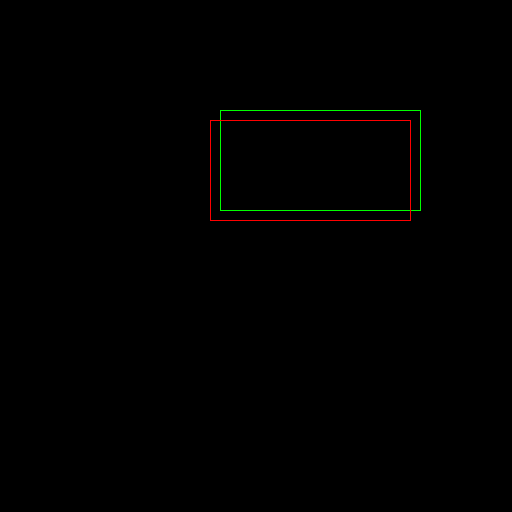

In [ ]:
# Depending on the number of bounding boxes, visualize the results. 
img = np.zeros([512,512,3] ,dtype = np.uint8)
import cv2
box1, box2, = nms_result_2[0], nms_result_2[1]
img2 = cv2.rectangle(img, (box1[0], box1[1]), (box1[2], box1[3]) , color = (0,255,0))
img2 = cv2.rectangle(img, (box2[0], box2[1]), (box2[2], box2[3]) , color = (0,0,255))
cv2_imshow(img2)